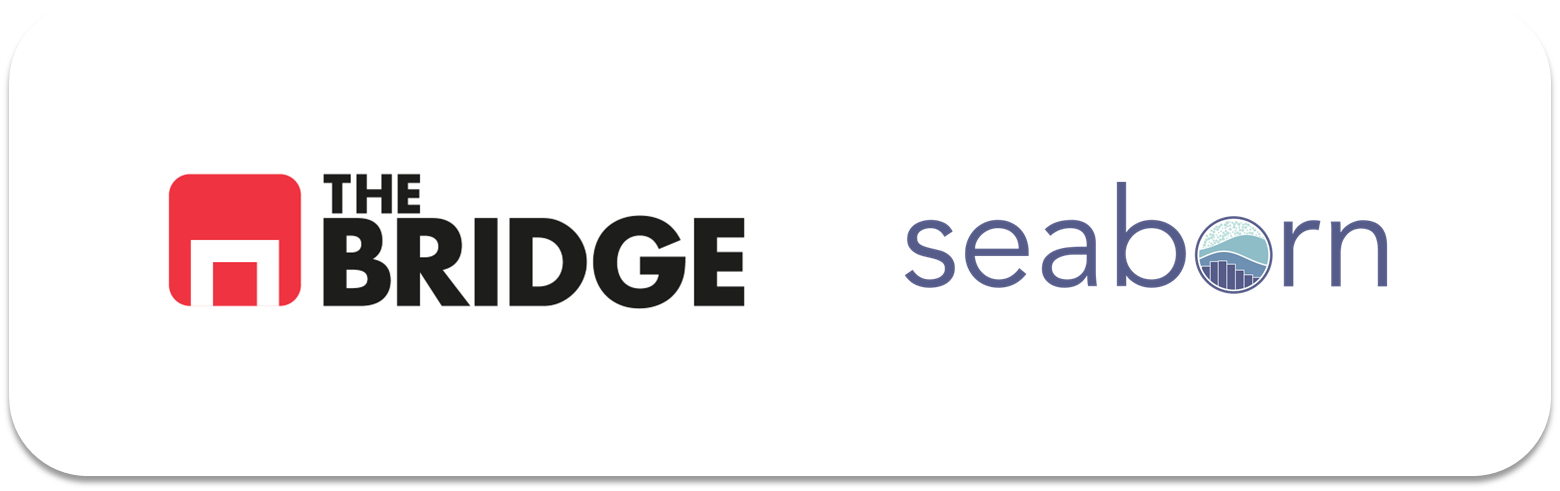

## PRACTICA OBLIGATORIA: VISUALIZACION Y PRESENTACION

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns



## #1 VISUALIZACION

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [2]:
cf=pd.read_csv("./data/california_cities.csv")
paises= pd.read_excel("./data/paises_ciudades.xlsx")

# Configurar pandas para mostrar todas las filas y columnas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
cf.head(2)

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37


In [4]:
# hice un dataframe combinando paises o estados con las ciudades
paises.head(2)

,PAISES,CIUDADES
0,Alameda County,"Alameda, Albany, El Cerrito, Emeryville, Fremont, Hayward, Oakland, Piedmont, San Leandro, San Lorenzo"
1,Amador County,Jackson


In [5]:
# concateno por si tuvuiera que hacer una clasificacion por paises 
df_new_california = pd.concat([cf, paises], axis=1)

In [6]:
#df_new_california.head(1)

### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [34]:

import seaborn as sns
import matplotlib.pyplot as plt

def scatter_plot(df1, num_col1, num_col2, categorical_col, size_arg, scale_factor=1.0,legend_type="both", hue=None):# con both podemos agragar una leyenda tanto para los colores
                                                                                                                       # que para los tamaños de l grafico de dispersion
      
    # Crear el gráfico de dispersión
    plt.figure(figsize=(12, 8))
    
    # comprobar si size es uan cadena de caracteres o no
    if isinstance(size_arg, str):
        # Escalar el tamaño de los puntos si size_arg es una cadena de caracteres
        sizes = df1[size_arg] * scale_factor# accede a la columna de un DF y despues se multiplica por el factor
    else:
        # Utilizar el valor proporcionado directamente si size_arg es un número
        sizes = size_arg
    
    # Crear el gráfico de dispersión con Seaborn
    sns.scatterplot(
        data=df1,
        x=num_col1,
        y=num_col2,
        hue=categorical_col if hue else None,# Agregar hue solo si se proporciona
        size=sizes,
        sizes=(10, 200),  # Rango de tamaños de puntos
        palette="deep",  
        legend=False,
        alpha=0.7,
        s=500
        
    )
    
    # Fake legend
    for area_total_km2 in [100, 200, 300, 400, 500, 600]:
        plt.scatter([],[], c="b", alpha=0.9, s=area_total_km2, label=str(area_total_km2))

    # Ajustar la ubicación de la Fake Legend
    plt.legend(frameon=False, title="Area en km2", loc="upper right")
    

    # Añadir título y etiquetas a los ejes
    plt.title(f'Scatter Plot entre {num_col1} y {num_col2}')
    plt.xlabel(num_col1)
    plt.ylabel(num_col2)

        
    # Mostrar el gráfico
    plt.show()



In [8]:
#cf.head(2)

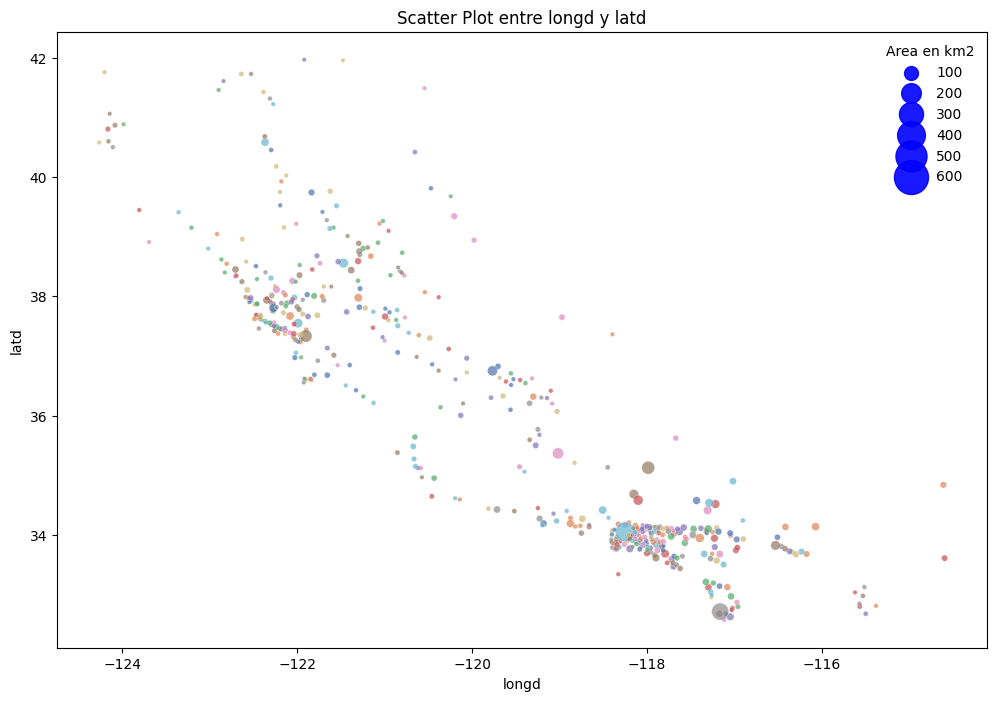

In [35]:
scatter_plot(cf, "longd", "latd", "city", "area_total_km2", scale_factor=1.0, legend_type="both", hue=True)

### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

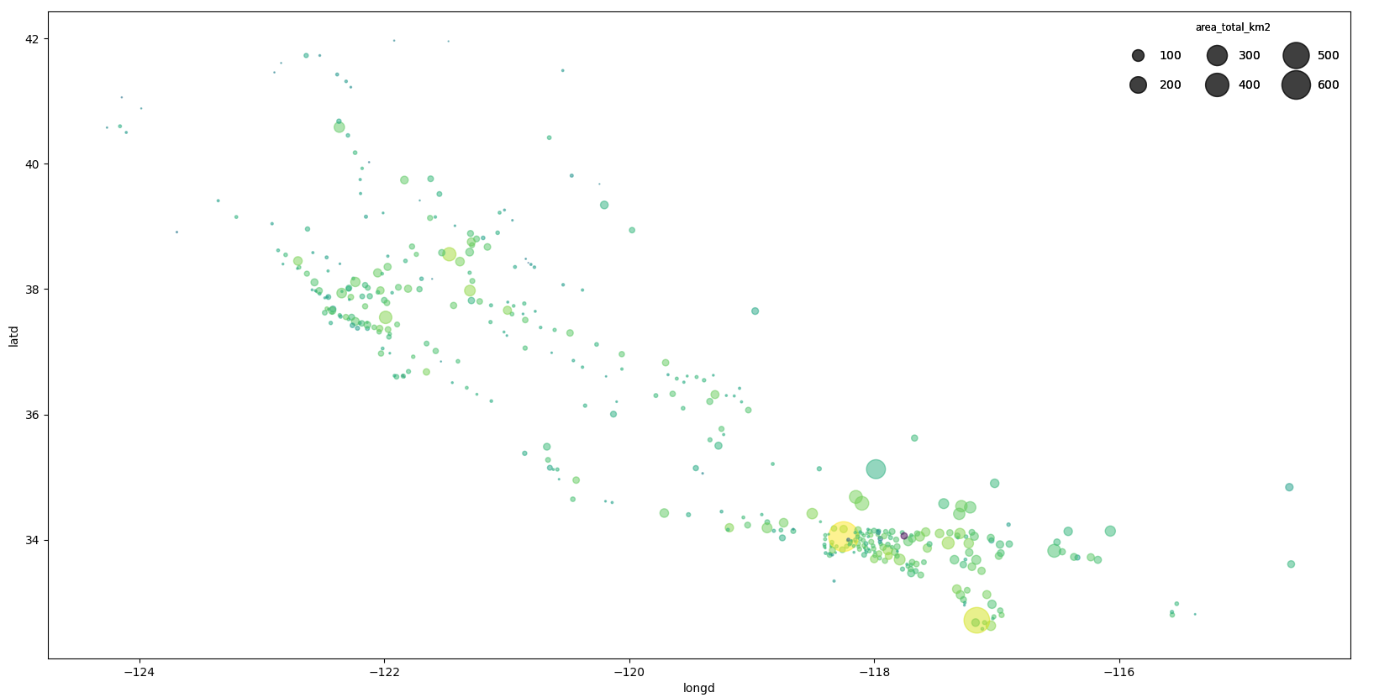

## #2: Presentación

In [10]:
df_titanic=pd.read_csv("./data/titanic.csv")


En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
 


### PRESENTACION DE UN RESUMEN DE TODA LA TABLA
(PARCH Y DECK ELIMINADAS POR ALTO NUMERO DE NAN)


|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|survived|columna con 2 valores 0 y 1 - supervientes y fallecidos|Binaria tipo int64|importante|
|pclass|establece el tipo de clase: alta(1), media(2) y baja(3)(int)|categoriga ordinal tipo int64|target|
|sex| establece el sexo de los pasajeros| Binaria tipo object|          |
|age| establece la edad de los pasajeros| numerica discreta tipo float64| target| 
|sibsp| establece si habia familiares o conyugues| categorica tipo int64|      |
|fare| precio pagado por cada pasajero|numerica discreta tipo float 64| importante|
|embarked| iniciales de las ciudades desde donde embarcan|Categorica tipo Object         |
|class| clase a la que pertenece cada pasajero(str)|Categorica Tipo Object       |
|who| el sexo de cada pasejero|categórica nominal tipo object|    |
|adult_male| si es hiombre o no el pasajero(bool)|Binaria tipo Booleana      |
|embark_town| ciudad donde se montaron cada uno de los pasajeros|categórica nominal tipo object|importante| 
|alive| si aun permanece vivo el pasajero en el presente| Binaria tipo object| target
|alone| establece si el pasajero vivio o murio solo o con familiares o conyuges| Binariatipo booleana| 

Y generar el notebook con las gráficas que vas a emplear en la presentación. Tienes que entregar ambas cosas.

In [11]:
#df_titanic.drop(columns="deck", inplace=True)
#df_titanic.drop(columns="parch", inplace=True)


In [12]:
#df_titanic.info()
# hay nulos en age que vamos a sustituir por la media y tanto embarked como embark_town debido a que son 3 valores le ponemos la moda

In [13]:
df_titanic.age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [14]:
#moda1= df_titanic.embark_town.mode()
#moda2 = df_titanic.embarked.mode()


In [15]:
# sustituimos Nan en age por la media 
df_titanic['age'] = df_titanic['age'].fillna(29.70)


In [16]:
# sustituimos por moda los Nan en embarked y embarked_town ( 3 valores)
#df_titanic.embark_town= df_titanic.embark_town.fillna(moda1)[0]
#df_titanic.embarked= df_titanic.embarked.fillna(moda2) [0]

In [17]:
df_titanic.info()#(completo)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [18]:
df_titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [19]:
#cardinalidad
cardinalidad= pd.DataFrame([df_titanic.nunique(), (df_titanic.nunique()/len(df_titanic)*100), df_titanic.dtypes]).T.rename(columns = {0: "Card",1: "%_Card", 2: "Tipo"})
cardinalidad["Clasificada_como"] = "Categorica" 
cardinalidad.loc[cardinalidad.Card == 2, "Clasificada_como"] = "binaria"
cardinalidad.loc[cardinalidad["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
cardinalidad.loc[cardinalidad["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
cardinalidad

,Card,%_Card,Tipo,Clasificada_como
survived,2,0.224467,int64,binaria
pclass,3,0.3367,int64,Categorica
sex,2,0.224467,object,binaria
age,89,9.988777,float64,Numerica Discreta
sibsp,7,0.785634,int64,Categorica
parch,7,0.785634,int64,Categorica
fare,248,27.833895,float64,Numerica Discreta
embarked,3,0.3367,object,Categorica
class,3,0.3367,object,Categorica
who,3,0.3367,object,Categorica


In [20]:
#hallamos las columnas numericas
columnas_numericas = df_titanic.describe().columns.tolist()


In [21]:
#hallamos la frecuencia relactiva
for F_relat in columnas_numericas:
    print(f"para {F_relat}")
    print(df_titanic[F_relat].value_counts()/len(df_titanic)*100)
    print("\n"*2)

para survived
survived
0    61.616162
1    38.383838
Name: count, dtype: float64



para pclass
pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64



para age
age
29.70    19.865320
24.00     3.367003
22.00     3.030303
18.00     2.918070
28.00     2.805836
30.00     2.805836
19.00     2.805836
21.00     2.693603
25.00     2.581369
36.00     2.469136
29.00     2.244669
35.00     2.020202
32.00     2.020202
26.00     2.020202
27.00     2.020202
31.00     1.907969
16.00     1.907969
34.00     1.683502
20.00     1.683502
23.00     1.683502
33.00     1.683502
39.00     1.571268
40.00     1.459035
17.00     1.459035
42.00     1.459035
45.00     1.346801
38.00     1.234568
4.00      1.122334
2.00      1.122334
50.00     1.122334
44.00     1.010101
47.00     1.010101
48.00     1.010101
54.00     0.897868
9.00      0.897868
1.00      0.785634
51.00     0.785634
37.00     0.673401
52.00     0.673401
41.00     0.673401
3.00      0.673401
14.00     0.673401
49.00     

In [22]:
#hallamos la frecuencia aboslutas
for catego in columnas_numericas:
    print(f"para {catego}")
    print(df_titanic[catego].value_counts())
    print("\n"*2)

para survived
survived
0    549
1    342
Name: count, dtype: int64



para pclass
pclass
3    491
1    216
2    184
Name: count, dtype: int64



para age
age
29.70    177
24.00     30
22.00     27
18.00     26
28.00     25
30.00     25
19.00     25
21.00     24
25.00     23
36.00     22
29.00     20
35.00     18
32.00     18
26.00     18
27.00     18
31.00     17
16.00     17
34.00     15
20.00     15
23.00     15
33.00     15
39.00     14
40.00     13
17.00     13
42.00     13
45.00     12
38.00     11
4.00      10
2.00      10
50.00     10
44.00      9
47.00      9
48.00      9
54.00      8
9.00       8
1.00       7
51.00      7
37.00      6
52.00      6
41.00      6
3.00       6
14.00      6
49.00      6
58.00      5
15.00      5
43.00      5
62.00      4
56.00      4
8.00       4
60.00      4
11.00      4
5.00       4
6.00       3
7.00       3
65.00      3
61.00      3
46.00      3
10.00      2
64.00      2
13.00      2
63.00      2
0.75       2
70.00      2
30.50      2
57.00     

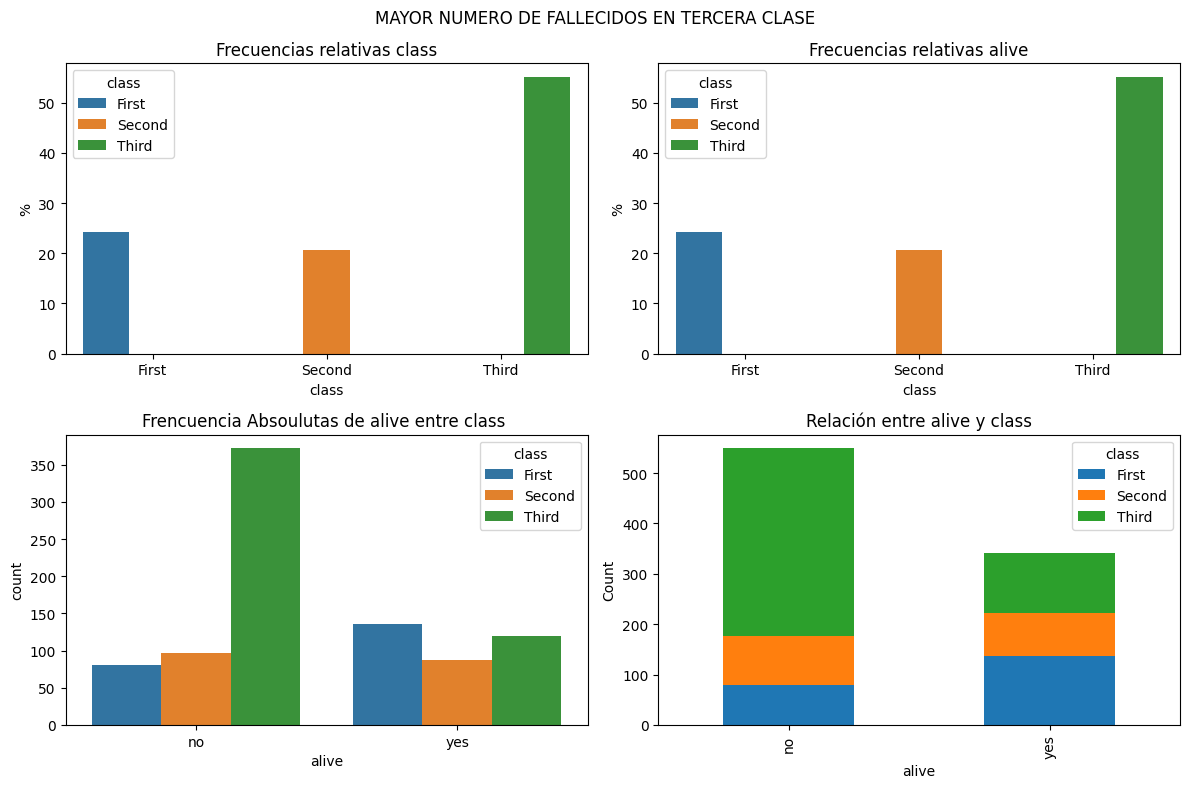

In [23]:
#DIBUJO FRECUENCIAS RELATIVAS ALIVE Y CLASS Y LA ABSOLUTA CONJUNTAMENTE CON AMBAS COLUMNAS

# Ordenar las categorías de class, utilizando categorical que convierte la columna elegida en una categoria ordenadam en nuestro caso por la lista ordena_class
ordena_class = ['First', 'Second', 'Third']
df_titanic['class'] = pd.Categorical(df_titanic['class'], categories=ordena_class, ordered=True)

# Creamos figura y axes
fig,axs = plt.subplots(nrows=2,ncols=2, figsize=(12,8))# creamos la figura que gusrada los arrays en axs
fig.suptitle("MAYOR NUMERO DE FALLECIDOS EN TERCERA CLASE");# suptitle le da titulo a toda la figura 
#barplot class
valores1 = df_titanic["class"].value_counts(normalize = True) * 100# frecuencia relactiva class
sns.barplot (x = valores1.index, y = valores1.values, hue =valores1.index, ax = axs[0,0])# aqui usamos el grafico de barras normal(x es el indice de los valores1 y values es la F,relativa,
# con hue que use un color para cada uno, los indices de valares y lo colocamos en la figura)
axs[0,0].set_title("Frecuencias relativas class")
axs[0,0].set_ylabel("%")
#barplot alive
valores2 = df_titanic["alive"].value_counts(normalize=True)*100 # frecuencia relativa alive
sns.barplot (x = valores1.index, y = valores1.values, hue =valores1.index, ax = axs[0,1])
axs[0,1].set_title("Frecuencias relativas alive")
axs[0,1].set_ylabel("%")
#hacemos im counntplot de alive y class
sns.countplot(x = "alive", data = df_titanic,hue ="class", ax=axs[1,0])# countplot es el que nos hace frecuencias absolutas con seaborn(con hue es con el que se controla 
# el color de los datos), si no lo pusieramos nos pusieran todas las barras del mimso color
axs[1,0].set_title("Frencuencia Absoulutas de alive entre class ");
#plt.title ("Frecuencias Absolutas Embark_town")# con esta tb sale pero crea una figura abajo vacia con el titulo dado

# Crear un gráfico de barras apiladas entre alive y class
ct= pd.crosstab(df_titanic["alive"], df_titanic["class"])
ct.plot(kind='bar', stacked=True, ax= axs[1,1])
axs[1,1].set_title('Relación entre alive y class')
axs[1,1].set_xlabel("alive")
axs[1,1].set_ylabel('Count')


# Ajustar el diseño
plt.tight_layout()

# Mostrar la figura
plt.show()



#### 1 El titanic fue un accidente con una tasa de mortalidad alta. 

Si, teniendo en cuenta los datos aportados y la grafica arriba expuesta, fallecieron un total de 549 personas y sobrevieron 349. En el barco iban un total de 891 personas, divididos en 537 hombres, 271 mujeres y 83 niños, concretamente 40 niños (577-537) y 43 niñas

### que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  


de la tercera clase, fallecieron un total de 491 personas del total que fueron 549  representando un 89,43% del total de fallecidos, y como puede apreciarse en la grafica

In [24]:
columnas_clase = ["class","alive"]
#hallamos la frecuencia  absoluta
for catego in columnas_clase:
    print(f"para {catego}")
    print(df_titanic[catego].value_counts())
    print("\n"*2)

para class
class
Third     491
First     216
Second    184
Name: count, dtype: int64



para alive
alive
no     549
yes    342
Name: count, dtype: int64





In [25]:
#tabla de contingencia alive y class y who

def plot_cat_relation(df, variable1, variable2, variable3):

    plt.figure(figsize=(10, 8))
  
    # Crear un gráfico de barras apiladas
    # agrupo por combinaciones unicas de sus valores y contamos el valor de la 3 en el grupo,  obteniendo  la F. absoluta por valor unicos par acada combinacion unioca con
    #las variables agrupadas
    df.groupby([variable1, variable2])[variable3].value_counts().unstack().plot(kind='bar', stacked=False)
    
    
    
    pd.crosstab(df[variable1], df[variable2], df[variable3]).plot(kind='bar', stacked=False)
    plt.title(f'Relación entre {variable1}, {variable2} y {variable3}')
    plt.xlabel(variable1)
    plt.ylabel('Count')
    plt.legend()
    plt.show()

   

ValueError: values cannot be used without an aggfunc.

<Figure size 1000x800 with 0 Axes>

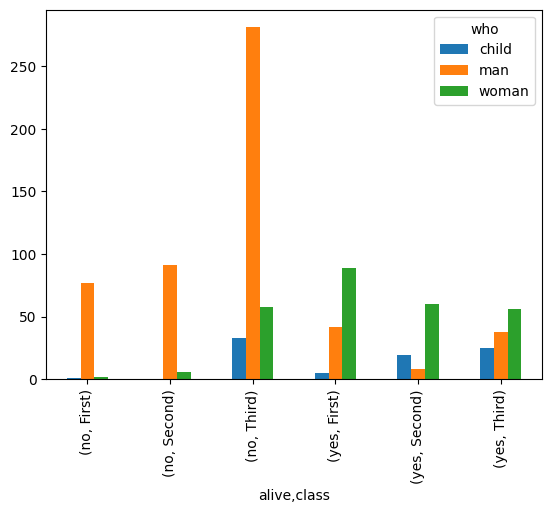

In [26]:
plot_cat_relation(df_titanic, "alive", "class", "who")

### En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero... 

Asi, el numero de niños y mujeres fallecidas fueron en una proporcion mucho menor a los hombres, pero teniendo en comun que pertenecian a tercera clase, No obstante, el numero de mujeres y de niños supervivientes es mayor al porcentaje de fallecidos.

In [ ]:
tabla_contingencia = pd.crosstab(df_titanic['alive'], df_titanic['who'])# categoricas

tabla_contingencia

who,child,man,woman
alive,,,
no,34,449,66
yes,49,88,205


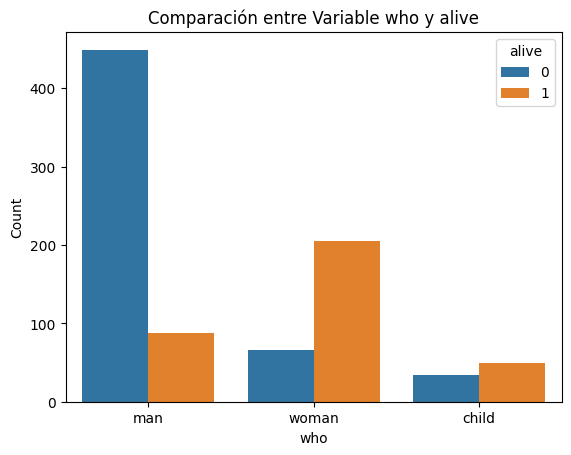

In [ ]:
# Crear un gráfico de barras
sns.countplot(x='who', hue='alive', data=df_titanic)

# Añadir etiquetas y título
plt.xlabel('who')
plt.ylabel('Count')
plt.title('Comparación entre Variable who y alive')

# Mostrar la leyenda
plt.legend(title='alive', labels=['0', '1'])

# Mostrar el gráfico
plt.show()

### las diferencias de tasas de supervivencia entre mujeres y niños. 

Teniendo en cuenta la tabla de contigencia anterior, sobrevivieron 49 niños y 205 mujes en terminos absolutos, es decir un 59% de los niños y un 75% de las mujeres, quedando aun mas claro en el grafico de arriba.

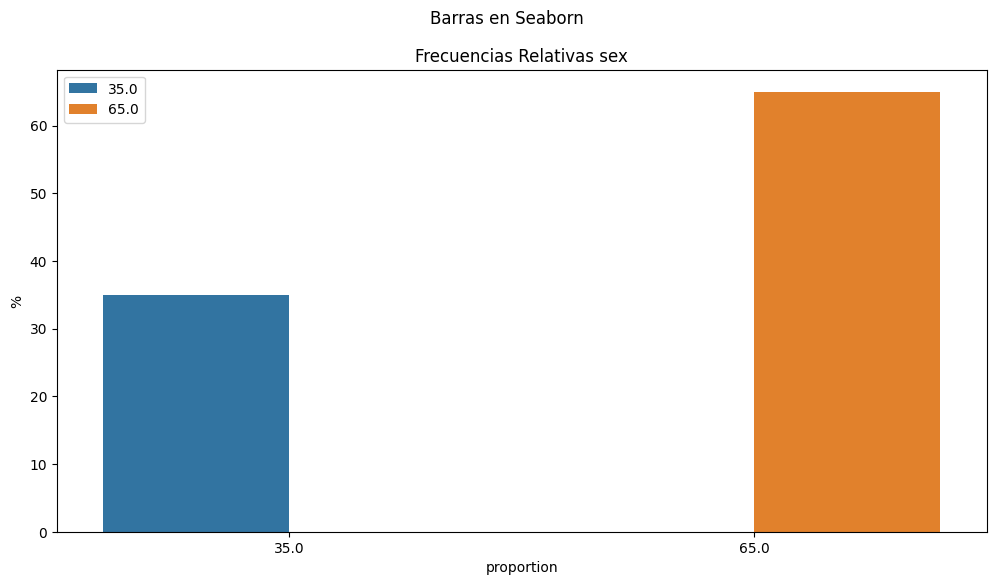

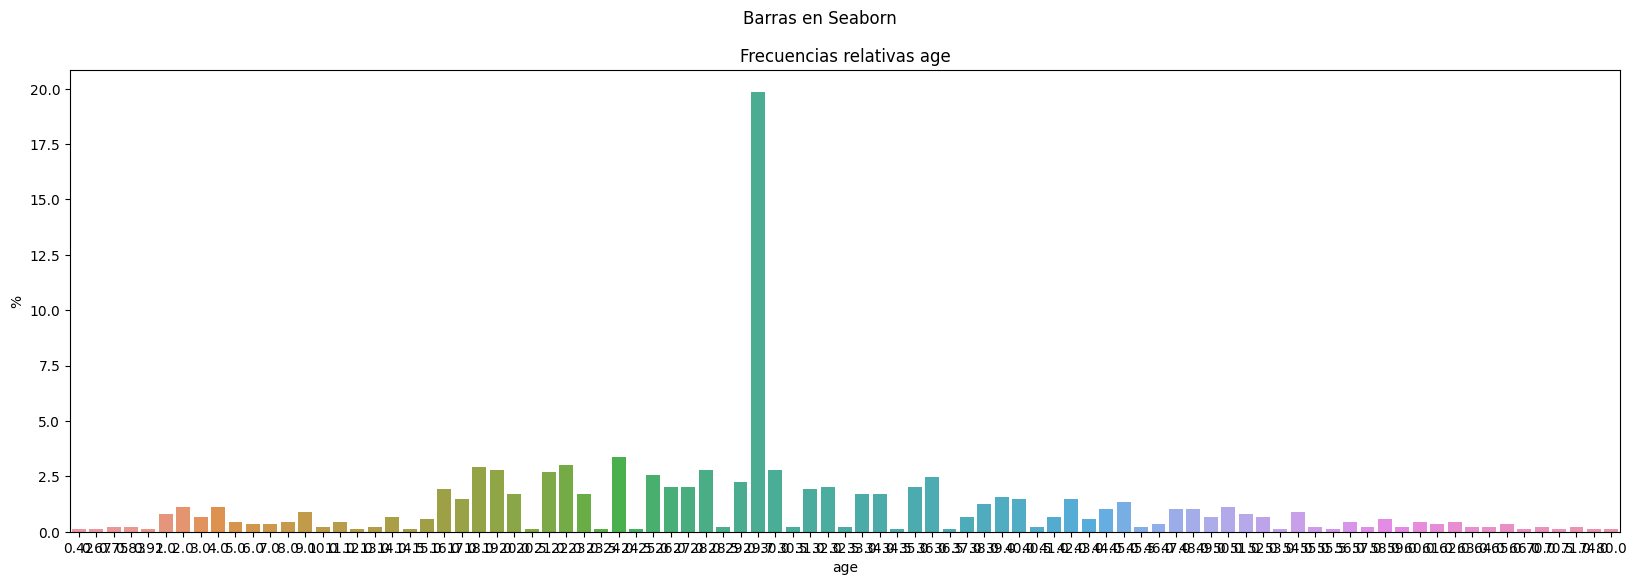

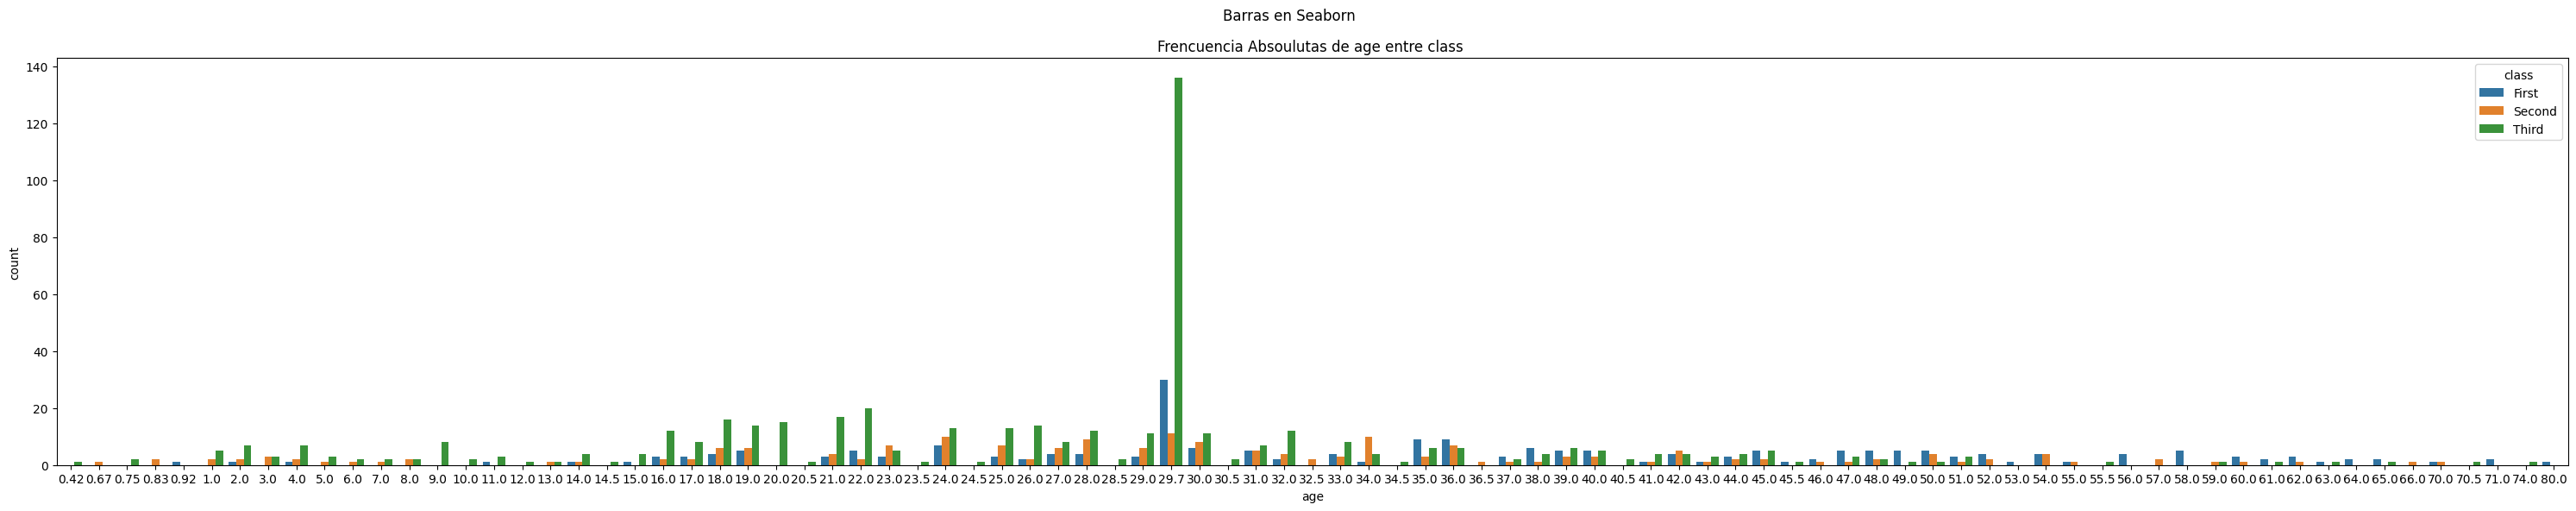

In [ ]:
#DIBUJO FRECUENCIAS RELATIVAS SEX/AGE Y LA ABSOLUTA CONJUNTAMENTE CON AMBAS CLASS /AGE
# Creamos figura y axes
fig,axs = plt.subplots(nrows=1,ncols=1, figsize=(12,6))
fig.suptitle("Barras en Seaborn");
# HACEMOS UN BARPLOT
valores = round(df_titanic.sex.value_counts(normalize = True) * 100);## fRECUENCIAS RELATIVAS
sns.barplot(x = valores, y = valores.values, hue =valores.values)# aqui usamos el grafico de barras normal(x es el indice de los valores y values es la F,relativa,
# con hue que use un color para cada uno, los indices de valares y lo colocamos en la figura principal)
axs.set_title("Frecuencias Relativas sex")
axs.set_ylabel("%")

# Creamos figura y axes
fig,axs = plt.subplots(nrows=1,ncols=1, figsize=(20,6))
fig.suptitle("Barras en Seaborn");
# BARPLOT 
valores = (df_titanic['age'].value_counts(normalize=True) * 100)
sns.barplot(x=valores.index, y=valores.values, ax=axs)
axs.set_title("Frecuencias relativas age")
axs.set_ylabel("%")

# Creamos figura y axes
fig,axs = plt.subplots(nrows=1,ncols=1, figsize=(30,6))# creamos la figura que gusrada los arrays en axs
fig.suptitle("Barras en Seaborn");# suptitle le da titulo a toda la figura 
#COUNTPLOT
sns.countplot(x = "age", data = df_titanic,hue ="class")
axs.set_title("Frencuencia Absoulutas de age entre class ");
# Ajustar el diseño
plt.tight_layout()

# Mostrar la figura
plt.show()


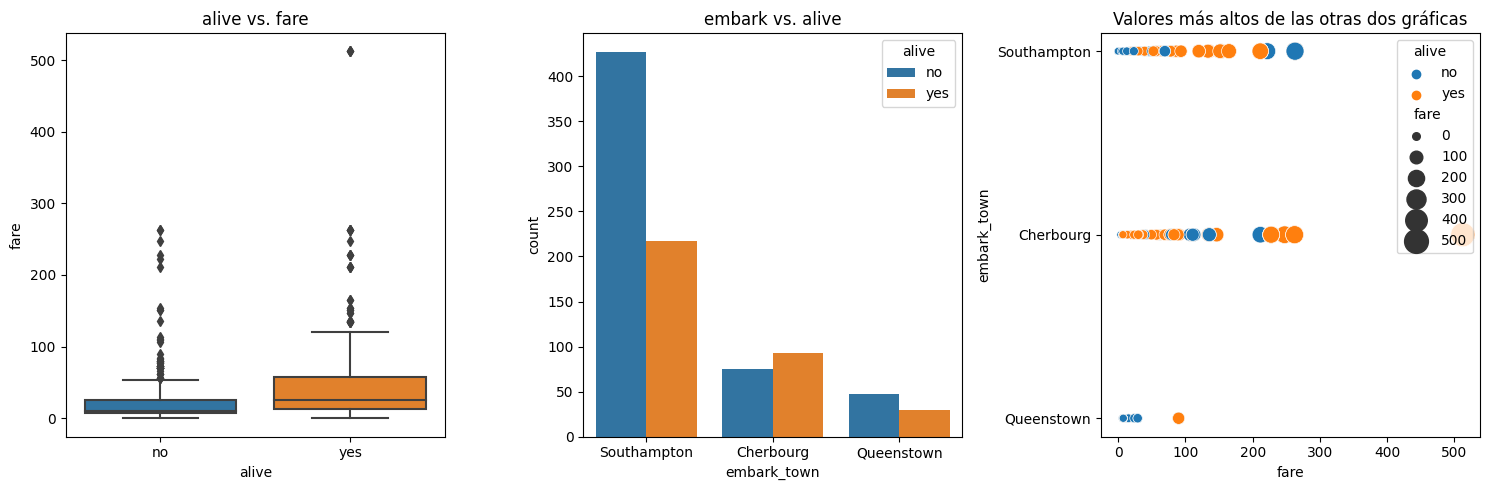

In [ ]:
 
# Crear la figura y los ejes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Primer gráfico: Binaria vs. Numérica
sns.boxplot(x='alive', y='fare', data=df_titanic, ax=axes[0])
axes[0].set_title('alive vs. fare')

# Segundo gráfico: Categórica vs. Binaria
sns.countplot(x='embark_town', hue='alive', data=df_titanic, ax=axes[1])
axes[1].set_title('embark vs. alive')

# Tercer gráfico: Valores más altos de las otras dos gráficas
sns.scatterplot(x='fare', y='embark_town', hue='alive', data=df_titanic,
                ax=axes[2], size='fare', sizes=(30, 300))
axes[2].set_title('Valores más altos de las otras dos gráficas')


# Ajustar el diseño
plt.tight_layout()
plt.show()

  ### Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.

EL puerto de embarque donde mas subieron personas fue Southampton con 644 pasajeros y como ya dijimos hubo un total de 491 personas de 3 clase, por lo que hay una importancia estadistica significativa entre el numero de pasajeros que subieron al primer puerto de 3 clase con una mayor probabilidad de fallecer

In [ ]:
columnas_ciudad= ["embark_town","alive","class"]
#hallamos la frecuencia absoluta
for catego in columnas_ciudad:
    print(f"para {catego}")
    print(df_titanic[catego].value_counts())
    print("\n"*2)

para embark_town
embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64



para alive
alive
no     549
yes    342
Name: count, dtype: int64



para class
class
Third     491
First     216
Second    184
Name: count, dtype: int64





ValueError: values cannot be used without an aggfunc.

<Figure size 1000x800 with 0 Axes>

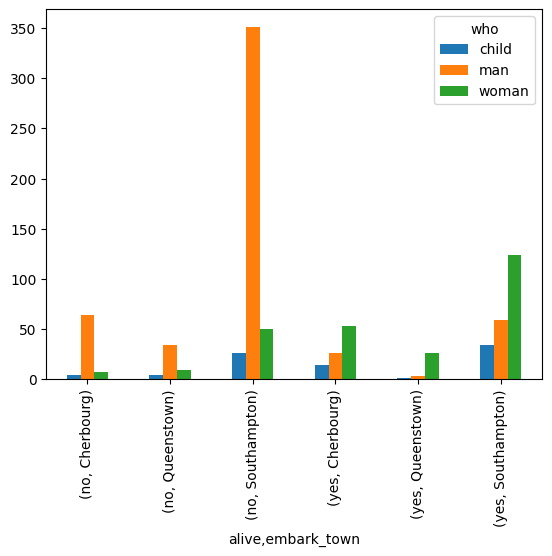

In [ ]:
plot_cat_relation(df_titanic, "alive", "embark_town", "who")

para embark_town
embark_town
Southampton    891
Name: count, dtype: int64



para alive
alive
no     549
yes    342
Name: count, dtype: int64



para who
who
man      537
woman    271
child     83
Name: count, dtype: int64



